In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fetch_stock_data(ticker, start_date):
    """
    Fetch daily stock price data using yfinance.

    :param ticker: Stock ticker symbol (e.g., 'AAPL')
    :param start_date: Start date for data retrieval (format: 'YYYY-MM-DD')
    :return: DataFrame containing the stock's historical price data
    """
    # Get current date to serve as the end date
    end_date = pd.Timestamp.now().strftime('%Y-%m-%d')
    
    # Download the stock price data from yfinance
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    
    return stock_data

def moving_average_crossover_strategy(data, short_window=40, long_window=100):
    """
    Generate trading signals based on the Moving Average Crossover strategy.

    :param data: DataFrame containing stock price data with a 'Close' column
    :param short_window: Number of days for the short moving average
    :param long_window: Number of days for the long moving average
    :return: DataFrame containing the stock's price, moving averages, and buy/sell signals
    """
    # Create a DataFrame to hold the stock price and moving averages
    signals = pd.DataFrame(index=data.index)
    signals['price'] = data['Close']
    
    # Calculate short and long moving averages
    signals['short_mavg'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    signals['long_mavg'] = data['Close'].rolling(window=long_window, min_periods=1).mean()

    # Generate signals: 1.0 = Buy, 0.0 = Hold/Sell
    signals['signal'] = 0.0
    signals.iloc[short_window:, signals.columns.get_loc('signal')] = np.where(
        signals['short_mavg'].iloc[short_window:] > signals['long_mavg'].iloc[short_window:], 1.0, 0.0
    )

    # Calculate positions: 1.0 = Buy, -1.0 = Sell
    signals['positions'] = signals['signal'].diff()

    return signals

def plot_signals(signals):
    """
    Plot stock prices and the corresponding buy/sell signals based on the Moving Average Crossover strategy.

    :param signals: DataFrame containing the stock's price, moving averages, and buy/sell signals
    """
    plt.figure(figsize=(14, 7))
    
    # Plot the stock's closing price
    plt.plot(signals.index, signals['price'], label='Close Price', color='blue', alpha=0.5)
    
    # Plot the short and long moving averages
    plt.plot(signals.index, signals['short_mavg'], label='40-Day Moving Average', color='orange', alpha=0.75)
    plt.plot(signals.index, signals['long_mavg'], label='100-Day Moving Average', color='green', alpha=0.75)
    
    # Plot Buy signals
    plt.plot(signals.loc[signals['positions'] == 1.0].index, 
             signals['short_mavg'][signals['positions'] == 1.0], 
             '^', markersize=10, color='g', label='Buy Signal', lw=0)
    
    # Plot Sell signals
    plt.plot(signals.loc[signals['positions'] == -1.0].index, 
             signals['short_mavg'][signals['positions'] == -1.0], 
             'v', markersize=10, color='r', label='Sell Signal', lw=0)
    
    # Plot formatting
    plt.title('Stock Price with Moving Average Crossover Strategy Signals')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()


[*********************100%%**********************]  1 of 1 completed


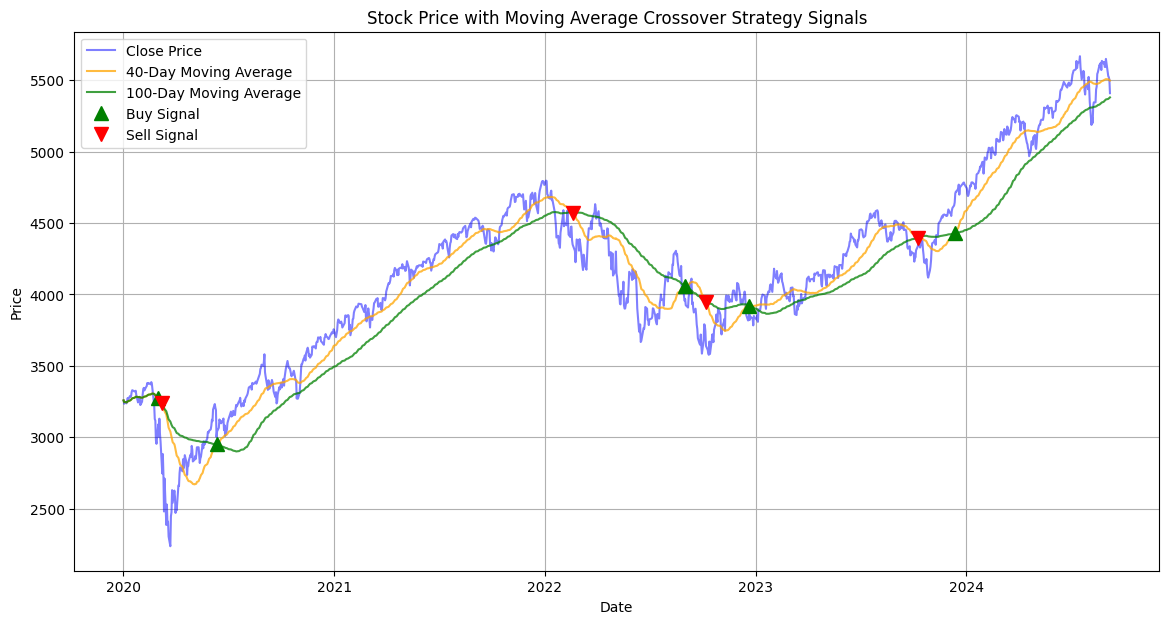

In [3]:
# Example  run
data = fetch_stock_data('^GSPC', '2020-01-01')
    
# Generate buy/sell signals using the Moving Average Crossover strategy
signals = moving_average_crossover_strategy(data)
    
# Plot the signals and price
plot_signals(signals)